In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Iterations = 500')

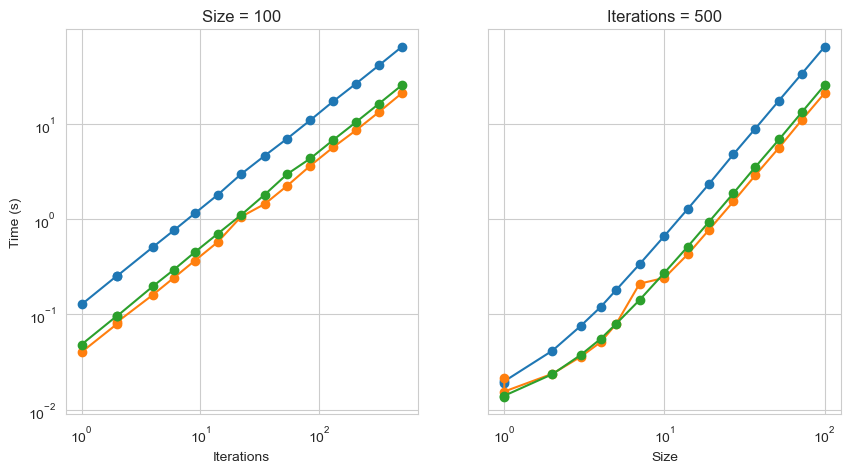

In [50]:
df_serial = pd.read_csv('../serial_code/results.csv')
timeplot_100_df_serial = df_serial[df_serial["size"] == 100]
sizeplot_100_df_serial = df_serial[df_serial["iterations"] == 500]

df_cython = pd.read_csv('../cython_code/results.csv')
timeplot_100_df_cython = df_cython[df_cython["size"] == 100]
sizeplot_100_df_cython = df_cython[df_cython["iterations"] == 500]

df_numba = pd.read_csv('../numba_code/results.csv')
timeplot_100_df_numba = df_numba[df_numba["size"] == 100]
sizeplot_100_df_numba = df_numba[df_numba["iterations"] == 500]

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)

ax[0].plot(timeplot_100_df_serial["iterations"], timeplot_100_df_serial["time"], marker='o', linestyle='-')
ax[0].plot(timeplot_100_df_cython["iterations"], timeplot_100_df_cython["time"], marker='o', linestyle='-')
ax[0].plot(timeplot_100_df_numba["iterations"], timeplot_100_df_numba["time"], marker='o', linestyle='-')
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Time (s)")
ax[0].set_title("Size = 100")


ax[1].plot(sizeplot_100_df_serial["size"], sizeplot_100_df_serial["time"], marker='o', linestyle='-')
ax[1].plot(sizeplot_100_df_cython["size"], sizeplot_100_df_cython["time"], marker='o', linestyle='-')
ax[1].plot(sizeplot_100_df_numba["size"], sizeplot_100_df_numba["time"], marker='o', linestyle='-')
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("Size")
ax[1].set_title("Iterations = 500")

In [ ]:
    cdef double[:,::1] Qab = np.zeros((3,3), dtype=np.double)
    cdef double[:,::1] delta = np.eye(3,3)
    #
    # Generate a 3D unit vector for each cell (i,j) and
    # put it in a (3,i,j) array.
    #
    cdef double[:,:,::1] lab = np.vstack((np.cos(arr),np.sin(arr),np.zeros_like(arr))).reshape(3,nmax,nmax)

    cdef:
        int i, j, a, b

    cdef double[:,:,::1] temp_Qab = np.zeros((3, 3, nmax), dtype=np.double)

    # for a in range(3):
    #     for b in range(3):
    #         for i in range(nmax):
    #             for j in range(nmax):
    #                 c_version_Qab[a][b] = 0.0

    # for a in range(3):
    #     for b in range(3):
    #         for i in prange(nmax, nogil=True, num_threads=threads):
    #             for j in range(nmax):
    #                 c_version_Qab[a][b][i][j] = 3*lab[a,i,j]*lab[b,i,j] - delta[a,b]
    #         for i in range(nmax):
    #             for j in range(nmax):
    #                 Qab[a,b] += c_version_Qab[a][b][i][j]/(2*nmax*nmax)

    for a in range(3):
        for b in range(3):
            for i in prange(nmax, nogil=True, num_threads=threads):
                for j in range(nmax):
                    temp_Qab[a,b][i] = 3*lab[a,i,j]*lab[b,i,j] - delta[a,b]
            for i in range(nmax):
                Qab[a, b] += temp_Qab[a,b][i]
    Qab[a,b] = Qab/(2*nmax*nmax)